1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
%reset_selective

Once deleted, variables cannot be recovered. Proceed (y/[n])?   y


No regex pattern specified. Nothing done.


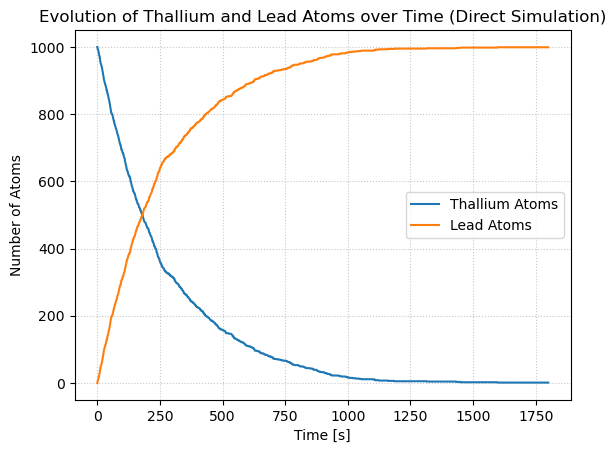

[3.78731147 3.77299487 3.75873239 ... 0.00419382 0.00417797 0.00416218]


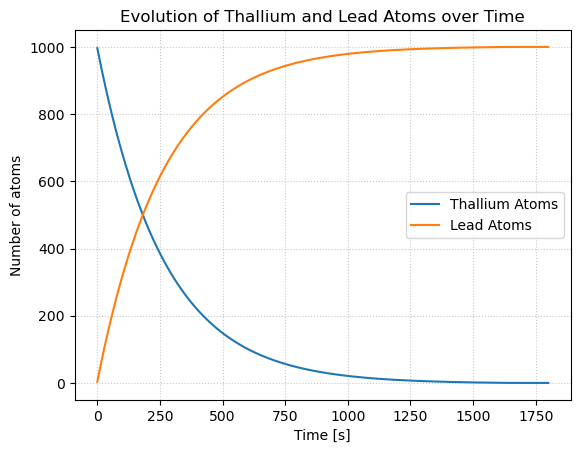

In [11]:
import numpy as np
import matplotlib.pyplot as plt

half_life = 3.052 * 60 
initial_Tl_atoms = 1000
initial_Pb_atoms = 0
total_time = 1800  
dt=1

def decay_probability(t):
    return 1 - 2**(-t / half_life)

Tl_atoms = [initial_Tl_atoms]
Pb_atoms = [initial_Pb_atoms]

for t in range(1,total_time + 1):
    decayed_Tl_atoms = np.sum(np.random.random(Tl_atoms[-1]) < decay_probability(dt))
    
    Tl_atoms.append(Tl_atoms[-1] - decayed_Tl_atoms)
    Pb_atoms.append(Pb_atoms[-1] + decayed_Tl_atoms)

plt.plot(range(total_time + 1), Tl_atoms, label='Thallium Atoms')
plt.plot(range(total_time + 1), Pb_atoms, label='Lead Atoms')
plt.xlabel('Time [s]')
plt.ylabel('Number of Atoms')
plt.title('Evolution of Thallium and Lead Atoms over Time (Direct Simulation)')
plt.legend(loc='best')
plt.grid(linestyle=':',alpha=0.7)
plt.show()
##########################################
def prob(t):
    return 2**(-t/half_life)*np.log(2)/half_life
time = np.linspace(0, 1800, 1800)
probabilities = prob(time) # a list
delta_t = time[1] - time[0]  

decayed_atoms = probabilities * initial_Tl_atoms*delta_t # a list
print(decayed_atoms)
remaining_Tl_atoms = initial_Tl_atoms - np.cumsum(decayed_atoms)
remaining_Pb_atoms=np.cumsum(decayed_atoms)

remaining_Tl_atoms[remaining_Tl_atoms < 0] = 0
remaining_Pb_atoms[remaining_Pb_atoms>initial_Tl_atoms]=initial_Tl_atoms


plt.plot(time, remaining_Tl_atoms, label='Thallium Atoms')
plt.plot(time, remaining_Pb_atoms, label='Lead Atoms')
plt.legend(loc='best')
plt.grid(linestyle=':', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
plt.title('Evolution of Thallium and Lead Atoms over Time')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [6]:
import numpy as np
from scipy.constants import physical_constants as phc
Z = 79
e = phc['elementary charge'][0]
epsilon_0 = phc['vacuum electric permittivity'][0]
E = 7.7e6 * e 
N = 1e6  
a0 = phc['Bohr radius'][0]
sigma = a0 / 100  

mean = np.array([0, 0])
cov = np.array([[sigma**2, 0], [0, sigma**2]])#cov matrix
beam_profile = np.random.multivariate_normal(mean, cov, int(N))
b=np.linalg.norm(beam_profile, axis=1)

scattering_angles = 2 * np.arctan(Z * e**2 / (2 * np.pi * epsilon_0 * E * b))

bounce_back_count = np.sum(scattering_angles > np.pi / 2)
fraction_bounce_back = bounce_back_count / N

print(f'Fraction of particles that bounce back: {fraction_bounce_back}')

Fraction of particles that bounce back: 0.001577


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

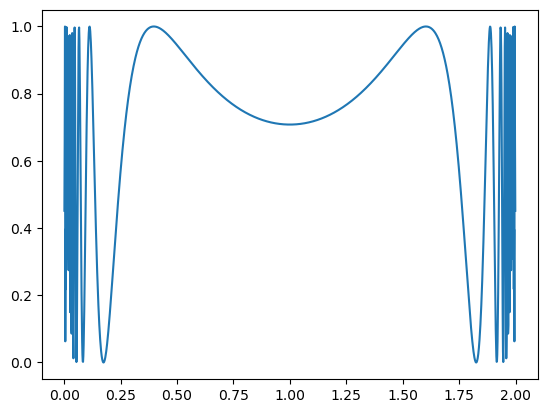

Hit/Miss Method:
Integral estimate: 1.4513829599999999
Error: 0.002481355763609928

Mean Value Method:
Integral estimate: 1.4515912684596914
Error:0.0005274275582913892


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1 / (x * (2 - x))) ** 2
x_val=np.linspace(0.001,1.999,1500)
plt.plot(x_val,f(x_val))
plt.show()

a = 0
b = 2
N = int(1e6) 

hitmiss=[]
for i in range(50):
    x= np.random.uniform(a, b, N)
    y= np.random.uniform(0, 1, N)
    N_under = np.sum(y <= f(x))
    integral = 2 * (N_under / N)
    hitmiss.append(integral)
integral_hit_miss=np.mean(hitmiss)
error_hitmiss=3*np.std(hitmiss)

var=np.var(f(np.random.uniform(a,b,N)))
integral_mean_value=(b-a)/N*np.sum(f(np.random.uniform(a,b,N)))
error_mean_value=(b-a)*np.sqrt(var)/np.sqrt(N)

print("Hit/Miss Method:")
print("Integral estimate:", integral_hit_miss)
print("Error:", error_hitmiss)

print("\nMean Value Method:")
print("Integral estimate:", integral_mean_value)
print(f'Error:{error_mean_value}')  

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
import numpy as np

def inside_circle(x, y):
    return x**2 + y**2 <= 1

N = int(15e6) 

x_rand = np.random.uniform(-1, 1, N)
y_rand = np.random.uniform(-1, 1, N)
N_inside_circle = np.sum(inside_circle(x_rand, y_rand))
area_circle = 4 * (N_inside_circle / N) 

print("Area of the circle (2D):", area_circle)

def sphere_vol(dim, N):   
    points = np.random.uniform(-1, 1, size=(N, dim))
    points_inside_sphere = np.sum(np.linalg.norm(points, axis=1) <= 1)
    
    sphere_volume_approx = np.power(2.,dim) * (points_inside_sphere / N)
    return sphere_volume_approx

dim = 10
volume = sphere_vol(dim, N)

print(f'Volume of a sphere {dim}D:{volume}')

Area of the circle (2D): 3.141328
Volume of a sphere 10D:2.5596586666666665


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [6]:
import numpy as np

N = int(1e7)
a=0
b=1
def w(x):
    return 1/np.sqrt(x)
def f(x):
    return x**(-1/2)/(np.exp(x)+1)
integral_w = 2*(np.sqrt(b) - np.sqrt(a))

x_samples = np.random.uniform(a, b, N)**2

integral_approx = 1/N *np.sum(f(x_samples)/w(x_samples)) * integral_w

print("Approximated integral value:", integral_approx)

Approximated integral value: 0.8388861887943213
